Importing Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score,roc_curve,auc, f1_score, roc_auc_score,confusion_matrix, accuracy_score, classification_report

Loading Dataset

In [83]:
test_data = pd.read_csv('./exoTest.csv').fillna(0)
train_data = pd.read_csv('./exoTrain.csv').fillna(0)

In [84]:
train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


Label Encoding

In [85]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]

Central Tendancy and Variations of Data

In [86]:
train_data
train_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,...,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1.073000e+03,1073.000000,1073.000000,1073.000000,1073.000000
mean,0.034483,-498.579422,-459.027353,-433.201240,-465.809031,-479.015126,-516.356198,-487.985061,-457.824250,-447.749059,...,1.920713e+03,2.317911e+03,2.678258e+03,2.762034e+03,2.662431e+03,2.594361e+03,-1232.330363,-1291.919059,-1132.150941,-998.853187
std,0.182551,10288.543169,9709.563821,9287.704085,9326.086668,8967.981474,8748.598720,8731.189456,8544.620284,8588.676088,...,5.843136e+04,7.441847e+04,9.204940e+04,1.054687e+05,1.072232e+05,1.117908e+05,27797.928743,30111.307505,29450.461568,26981.317785
min,0.000000,-216192.000000,-219338.000000,-212822.000000,-217468.000000,-221268.000000,-221588.000000,-226158.000000,-224812.000000,-223916.000000,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-4.788706e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-67.500000,-70.190000,-69.800000,-65.940000,-57.780000,-57.790000,-51.810000,-53.500000,-49.290000,...,-2.778000e+01,-2.483000e+01,-2.437000e+01,-2.731000e+01,-2.903000e+01,-2.765000e+01,-35.130000,-28.910000,-24.950000,-23.670000
50%,0.000000,-2.260000,-2.740000,-1.030000,-4.130000,-2.450000,-2.900000,-2.750000,-2.090000,-2.690000,...,1.550000e+00,3.760000e+00,3.020000e+00,2.770000e+00,2.480000e+00,4.730000e+00,-2.850000,0.410000,1.630000,1.920000
75%,0.000000,68.180000,55.330000,57.210000,50.690000,52.730000,53.520000,50.740000,42.530000,39.840000,...,2.445000e+01,2.926000e+01,3.444000e+01,3.389000e+01,3.600000e+01,3.889000e+01,22.400000,23.860000,26.780000,26.880000
max,1.000000,150725.800000,129578.360000,102184.980000,82253.980000,67934.170000,48063.520000,42745.020000,23435.380000,28871.000000,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,60257.870000,62293.370000,105002.000000,125694.000000


Outlier Detection and Removal

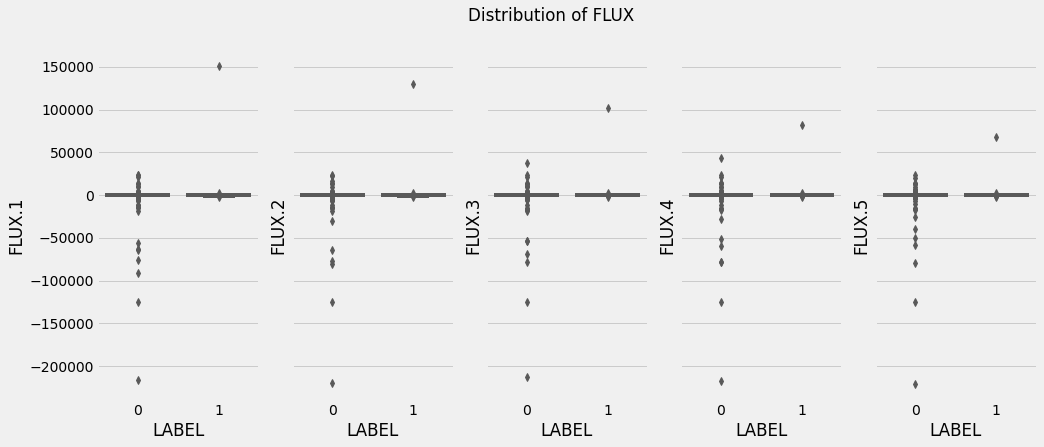

In [87]:
fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=train_data, x='LABEL', y='FLUX.1',palette="Set2")
sns.boxplot(ax=axes[1], data=train_data, x='LABEL', y='FLUX.2',palette="Set2")
sns.boxplot(ax=axes[2], data=train_data, x='LABEL', y='FLUX.3',palette="Set2")
sns.boxplot(ax=axes[3], data=train_data, x='LABEL', y='FLUX.4',palette="Set2")
sns.boxplot(ax=axes[4], data=train_data, x='LABEL', y='FLUX.5',palette="Set2")

In [88]:
train_data.drop(train_data[train_data['FLUX.1']>250000].index, axis=0, inplace=True)

In [89]:
train_data['LABEL'].value_counts()

0    1036
1      37
Name: LABEL, dtype: int64

Dataset Splitting

In [90]:
x_train = train_data.drop(["LABEL"],axis=1)
y_train = train_data["LABEL"]   
x_test = test_data.drop(["LABEL"],axis=1)
y_test = test_data["LABEL"]

Normalization

In [91]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

Guassian Filter

In [92]:
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

Feature Scaling

In [93]:
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

Dimensionality Reduction using Principal Component Analysis

In [94]:
from sklearn.decomposition import PCA
pca = PCA(random_state=420) 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1
print(k)

22


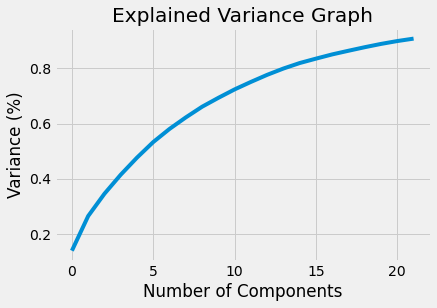

In [95]:
pca = PCA(n_components=k, random_state=420)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance Graph')
plt.show()

Resampling

In [96]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
sm = SMOTE(random_state=27)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 37
Before OverSampling, counts of label '0': 1036 

After OverSampling, counts of label '1': 1036
After OverSampling, counts of label '0': 1036


Model Training

In [97]:
def model(classifier,dtrain_x,dtrain_y,dtest_x,dtest_y):
    #fit the model
    classifier.fit(dtrain_x,dtrain_y)
    predictions = classifier.predict(dtest_x)
    
    #Cross validation
    accuracies = cross_val_score(estimator = classifier, X = x_train_res, y = y_train_res, cv = 5, n_jobs = -1)
    mean = accuracies.mean()
    variance = accuracies.std()
    print("Accuracy mean: "+ str(mean))
    print("Accuracy variance: "+ str(variance))
    
    #Accuracy
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    
    #Classification report
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
    
    #Confusion matrix
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)


Using Support Vector Machine(SVM) for prediction

Accuracy mean: 0.9956626506024098
Accuracy variance: 0.008674698795180723

accuracy_score : 0.9912280701754386

classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


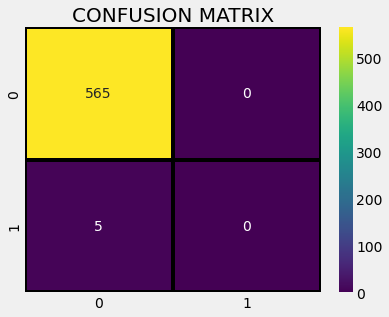

In [98]:
from sklearn.svm import SVC
SVM_model=SVC()
model(SVM_model,x_train_res,y_train_res,x_test,y_test)

Using Random Forest Model for prediction

Accuracy mean: 1.0
Accuracy variance: 0.0

accuracy_score : 0.9912280701754386

classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


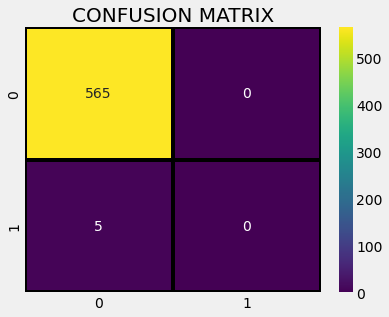

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
model(rf_classifier,x_train_res,y_train_res,x_test,y_test)